<a href="https://colab.research.google.com/github/HesamAsad/PyTorch_Tensorflow_Intro_CS231n_EECS498/blob/main/Deep_Learning_Software_cs231n_eecs498.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computational Graph 
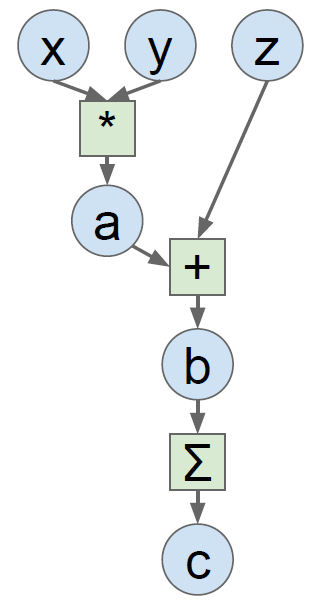

# Numpy

In [ ]:
import numpy as np

np.random.seed(0)

N, D = 3, 4
x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

a = x * y
b = a + z
c = np.sum(b)

grad_c = 1.0
grad_b = grad_c * np.ones((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a * y
grad_y = grad_a * x

print(grad_x)

[[ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]


# Tensorflow v1

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
np.random.seed(0)

N, D = 3, 4

with tf.device('/cpu:0'):           # for GPU use: '/gpu:0'
    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
    z = tf.placeholder(tf.float32)

    a = x * y 
    b = a + z
    c = tf.reduce_sum(b)

grad_x, grad_y, grad_z = tf.gradients(c, [x, y, z])

with tf.Session() as sess:
    values = {
        x: np.random.randn(N, D),
        y: np.random.randn(N, D),
        z: np.random.randn(N, D)
    }
    out = sess.run([c, grad_x, grad_y, grad_z], feed_dict=values)
    c_val, grad_x_val, grad_y_val, grad_z_val = out
    print(grad_x_val)

Instructions for updating:
non-resource variables are not supported in the long term


[[ 0.7610377   0.12167501  0.44386324  0.33367434]
 [ 1.4940791  -0.20515826  0.3130677  -0.85409576]
 [-2.5529897   0.6536186   0.8644362  -0.742165  ]]


# PyTorch

In [ ]:
import torch
from torch.autograd import Variable

N, D = 3, 4
x = Variable(torch.randn(N, D), requires_grad=True)     # for GPU use: torch.randn(N, D).cuda()
y = Variable(torch.randn(N, D), requires_grad=True)
z = Variable(torch.randn(N, D), requires_grad=True)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()

print(x.grad.data)

tensor([[-1.6149, -0.7832,  0.3016,  1.8028],
        [-0.7055,  0.9840, -0.4725, -0.4638],
        [ 0.7321, -1.9196,  1.5972,  1.6339]])


# PyTorch: Tensors

In [ ]:
import torch 

device = torch.device('cpu')

losses = []
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)

learning_rate = 1e-6
for t in range(500):
    h = x.mm(w1)                        # matrix mult
    h_relu = h.clamp(min = 0)           # RELU
    y_pred = h_relu.mm(w2)              # hidden layer
    loss = (y_pred - y).pow(2).sum()    # computing loss

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h_relu[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

    losses.append(loss)

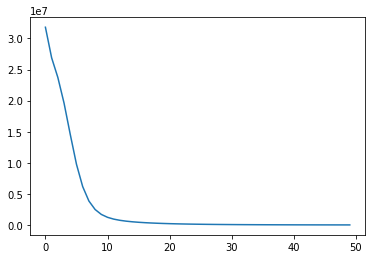

In [ ]:
from matplotlib import pyplot as plt

plt.plot(range(50), losses[:50])

# PyTorch: Autograd 

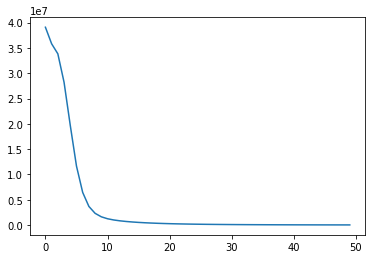

In [ ]:
import torch 

losses = []
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)   # matrix mult
    loss = (y_pred - y).pow(2).sum()        # computing loss

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

    losses.append(loss)

with torch.no_grad():
    plt.plot(range(50), losses[:50])

# PyTorch: New functions

## Python Functions

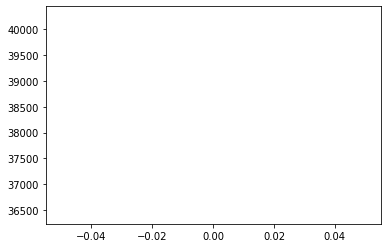

In [ ]:
import torch 

def sigmoid(x):
    return 1.0 / (1.0 + (-x).exp())

losses = []
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = sigmoid(x.mm(w1)).mm(w2)       # matrix mult
    loss = (y_pred - y).pow(2).sum()        # computing loss

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()
    losses.append(loss)

with torch.no_grad():
    plt.plot(range(50), losses[:50])

* NaN values!

## Subclassing

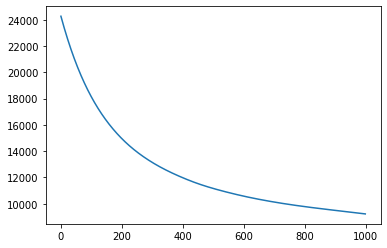

In [ ]:
class Sigmoid(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        y = 1.0 / (1.0 + (-x).exp())
        ctx.save_for_backward(y)
        return y
    
    @staticmethod
    def backward(ctx, grad_y):
        y, = ctx.saved_tensors
        grad_x = grad_y * y * (1.0 - y)
        return grad_x 

def sigmoid(x):
    return Sigmoid.apply(x)

losses = []
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

learning_rate = 1e-6
for t in range(1000):
    y_pred = sigmoid(x.mm(w1)).mm(w2)   # matrix mult
    loss = (y_pred - y).pow(2).sum()        # computing loss

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

    losses.append(loss)

with torch.no_grad():
    plt.plot(range(len(losses)), losses)

# PyTorch: nn

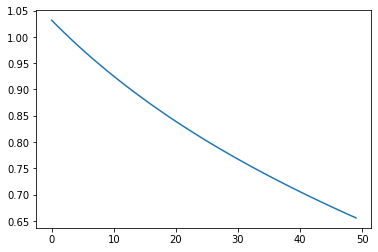

In [ ]:
import torch 

losses = []
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

learning_rate = 1e-2
for t in range(500):
    y_pred = model(x)                               # Forward pass
    loss = torch.nn.functional.mse_loss(y_pred, y)

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    model.zero_grad()

    losses.append(loss)

with torch.no_grad():
    plt.plot(range(50), losses[:50])

# PyTorch: optim

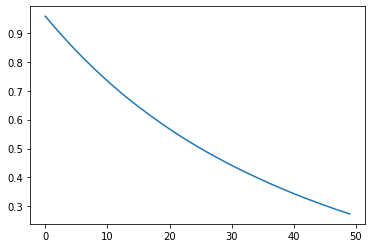

In [ ]:
import torch 

losses = []
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

learning_rate = 1e-4

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    y_pred = model(x)                               # Forward pass
    loss = torch.nn.functional.mse_loss(y_pred, y)

    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()

    losses.append(loss)

with torch.no_grad():
    plt.plot(range(50), losses[:50])

# PyTorch: nn, Defining modules 

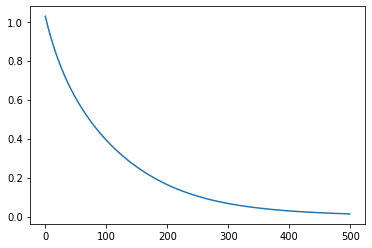

In [ ]:
import torch

losses = []

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = TwoLayerNet(D_in, H, D_out)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

for t in range(500):
    y_pred = model(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)

    losses.append(loss)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

with torch.no_grad():
    plt.plot(losses)

# PyTorch: DataLoaders

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

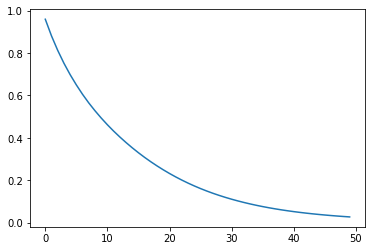

In [ ]:
N, D_in, H, D_out = 64, 1000, 100, 10
losses = []

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

loader = DataLoader(TensorDataset(x, y), batch_size=8)

model = TwoLayerNet(D_in, H, D_out)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
for epoch in range(50):
    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = torch.nn.functional.mse_loss(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(torch.nn.functional.mse_loss(model(x), y))

with torch.no_grad():
    plt.plot(range(len(losses)), losses)

# PyTorch: Pre-trained Models

In [ ]:
import torchvision

alexnet = torchvision.models.alexnet(pretrained=True)
vgg16 = torchvision.models.vgg16(pretrained=True)
resnet101 = torchvision.models.resnet101(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# PyTorch: Dynamic Computation Graph

In [ ]:
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H, requires_grad=True)
w2a = torch.randn(H, D_out, requires_grad=True)
w2b = torch.randn(H, D_out, requires_grad=True)

learning_rate = 1e-6
prev_loss = 5.0

for t in range(500):
    w2 = w2a if prev_loss < 5.0 else w2b # Using regular python control flow to construct computational graphs
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y).pow(2).sum()

    loss.backward()
    prev_loss = loss.item()

# PyTorch: Static Graphs with JIT

In [ ]:
def model(x, y, w1, w2a, w2b, prev_loss):
    w2 = w2a if prev_loss < 5.0 else w2b 
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    return loss

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H, requires_grad=True)
w2a = torch.randn(H, D_out, requires_grad=True)
w2b = torch.randn(H, D_out, requires_grad=True)

graph = torch.jit.script(model)

prev_loss = 5.0
learning_rate = 1e-6
for t in range(50):
    loss = graph(x, y, w1, w2a, w2b, prev_loss)

    loss.backward()
    prev_loss = loss.item()

# PyTorch: real example

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



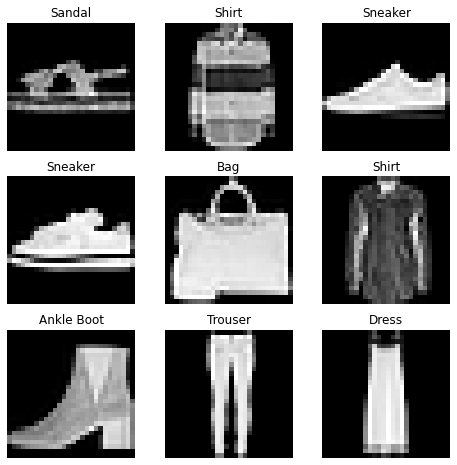

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from matplotlib import pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
learning_rate = 1e-2
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 200 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300106  [    0/60000]
loss: 0.437710  [12800/60000]
loss: 0.443464  [25600/60000]
loss: 0.405375  [38400/60000]
loss: 0.315110  [51200/60000]
Test Error: 
 Accuracy: 82.6%, Avg loss: 0.530263 

Epoch 2
-------------------------------
loss: 0.385825  [    0/60000]
loss: 0.510349  [12800/60000]
loss: 0.288750  [25600/60000]
loss: 0.284948  [38400/60000]
loss: 0.369756  [51200/60000]
Test Error: 
 Accuracy: 80.5%, Avg loss: 0.535733 

Epoch 3
-------------------------------
loss: 0.682651  [    0/60000]
loss: 0.369612  [12800/60000]
loss: 0.494970  [25600/60000]
loss: 0.371507  [38400/60000]
loss: 0.476706  [51200/60000]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.461921 

Epoch 4
-------------------------------
loss: 0.457413  [    0/60000]
loss: 0.240730  [12800/60000]
loss: 0.350581  [25600/60000]
loss: 0.351807  [38400/60000]
loss: 0.387648  [51200/60000]
Test Error: 
 Accuracy: 84.1%, Avg loss: 0.448412 

Epoch 5
------------------------

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')
##############
model.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [ ]:
torch.save(model, 'model.pth')
##############
model = torch.load('model.pth')

In [ ]:
!ls -l --block-size=M

total 6M
drwxr-xr-x 3 root root 1M Sep 29 20:33 data
-rw-r--r-- 1 root root 3M Sep 29 20:38 model.pth
-rw-r--r-- 1 root root 3M Sep 29 20:38 model_weights.pth
drwxr-xr-x 1 root root 1M Sep 26 13:45 sample_data


# Tensorflow 1.0: Static Graphs


In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

N, D, H = 64, 1000, 100

x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.placeholder(tf.float32, shape=(D, H))
w2 = tf.placeholder(tf.float32, shape=(H, D))

h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff**2, axis=1))

grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

learning_rate = 1e-3
with tf.Session() as sess:
    values = {
        x : np.random.randn(N, D),
        y : np.random.randn(N, D),
        w1 : np.random.randn(D, H),
        w2 : np.random.randn(H, D)
    }
    for epoch in range(100):
        out = sess.run([loss, grad_w1, grad_w2], feed_dict=values)
        loss_val, grad_w1_val, grad_w2_val = out

# Tensorflow 2.0: Dynamic Graphs

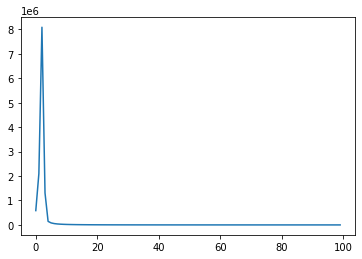

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt

N, Din, H, Dout = 64, 1000, 100, 10

x = tf.random.normal((N, Din))
y = tf.random.normal((N, Dout))
w1 = tf.Variable(tf.random.normal((Din, H)))
w2 = tf.Variable(tf.random.normal((H, Dout)))

learning_rate = 1e-4
losses = []

for t in range(100):
    with tf.GradientTape() as tape:
        h = tf.maximum(tf.matmul(x, w1), 0)
        y_pred = tf.matmul(h, w2)
        diff = y_pred - y
        loss = tf.reduce_mean(tf.reduce_sum(diff**2, axis=1))

    grad_w1, grad_w2 = tape.gradient(loss, [w1, w2])
    losses.append(loss)

    w1.assign(w1 - learning_rate * grad_w1)
    w2.assign(w2 - learning_rate * grad_w2)

plt.plot(losses)

# Tensorflow 2.0: Static Graphs

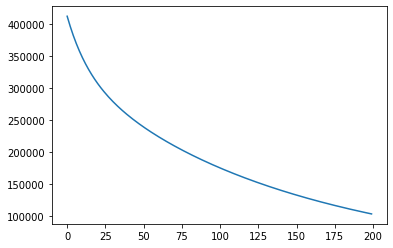

In [ ]:
# Define a function that implements forward, backward, and update
@tf.function
def step(x, y, w1, w2):
    with tf.GradientTape() as tape:
        h = tf.maximum(tf.matmul(x, w1), 0)
        y_pred = tf.matmul(h, w2)
        diff = y_pred - y
        loss = tf.reduce_mean(tf.reduce_sum(diff**2, axis=1))
    #note TF graph can include gradient computation and update, unlike PyTorch
    grad_w1, grad_w2 = tape.gradient(loss, [w1, w2])

    w1.assign(w1 - learning_rate * grad_w1)
    w2.assign(w2 - learning_rate * grad_w2)
    return loss

N, Din, H, Dout = 64, 1000, 100, 10
losses = []

x = tf.random.normal((N, Din))
y = tf.random.normal((N, Dout))
w1 = tf.Variable(tf.random.normal((Din, H)))
w2 = tf.Variable(tf.random.normal((H, Dout)))

learning_rate = 1e-6
for t in range(200):
    loss = step(x, y, w1, w2)
    losses.append(loss)

plt.plot(losses)

# Keras: High-level API

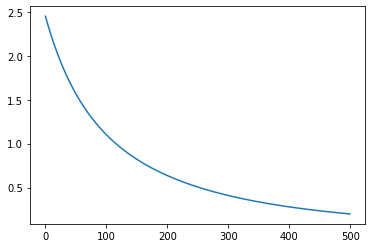

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

N, Din, H, Dout = 64, 1000, 100, 10
losses = []

model = Sequential()
model.add(InputLayer(input_shape=(Din,)))
model.add(Dense(units=H, activation='relu'))
model.add(Dense(units=Dout))
params = model.trainable_variables

loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)

x = tf.random.normal((N, Din))
y = tf.random.normal((N, Dout))

for t in range(500):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
    losses.append(loss)
    grads = tape.gradient(loss, params)
    opt.apply_gradients(zip(grads, params))

plt.plot(losses)

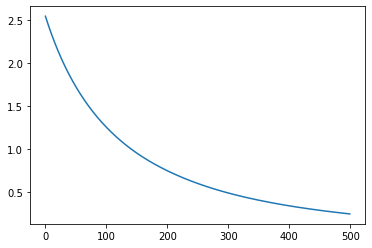

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

N, Din, H, Dout = 64, 1000, 100, 10
losses = []

model = Sequential()
model.add(InputLayer(input_shape=(Din,)))
model.add(Dense(units=H, activation='relu'))
model.add(Dense(units=Dout))
params = model.trainable_variables

loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)

x = tf.random.normal((N, Din))
y = tf.random.normal((N, Dout))

def step():
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    losses.append(loss)
    return loss

for t in range(500):
    opt.minimize(step, params)

plt.plot(losses)